### TEMPLATE MATCHING

En este trabajo práctico se busca la identificación de objetos a través de diferentes algoritmos, entre ellos __template matchin__. 

In [1]:
#Import libraries
import numpy as np
import cv2 as cv
import imutils
import matplotlib.pyplot as plt
import scipy.stats as st
from PIL import Image

#%matplotlib


### Ejercicio 1

### Detección del logo en cada imagen

### Coca logo 1

In [2]:
#Reading image
img_pattern = cv.imread('./imgs/tp3/template/pattern.png', 0)
img_pattern_down = cv.pyrDown(img_pattern)
print(img_pattern_down.shape) 

(88, 200)


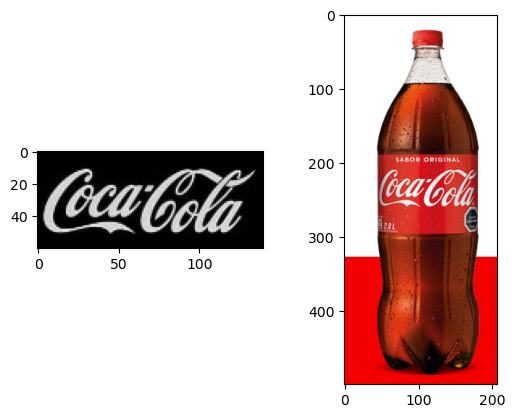

In [3]:

#Images to process
img_1 = cv.imread('./imgs/tp3/images/coca_logo_1.png')
img_pattern_1 = cv.resize(img_pattern,[140, 60])
img_pattern1 = cv.bitwise_not(img_pattern_1)
img_coca_logo_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_coca_logo_1_gray = cv.cvtColor(img_1, cv.COLOR_BGR2GRAY)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_pattern1, cmap= 'gray')
plt.subplot(1,2,2)
plt.imshow(img_coca_logo_1)

[INFO] performing template matching...
-8149394.0 6253293.5 (48, 107) (40, 208)
(40, 208)


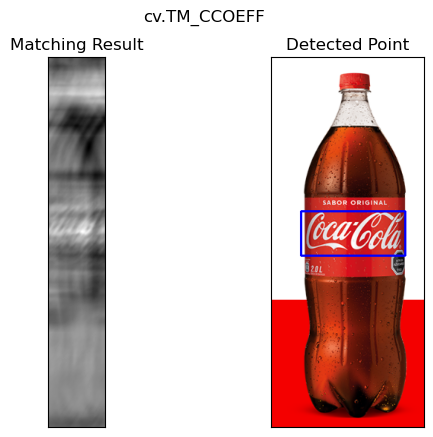

-0.30232515931129456 0.23163527250289917 (26, 436) (40, 208)
(40, 208)


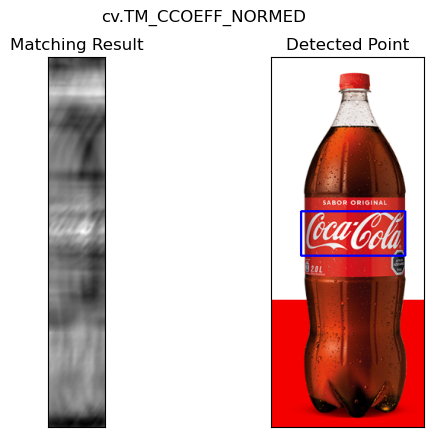

8603406.0 61162268.0 (48, 436) (58, 41)
(58, 41)


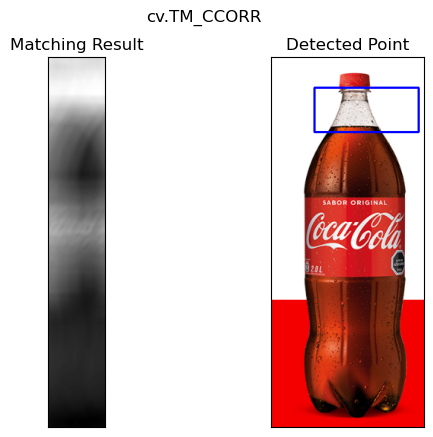

0.27982649207115173 0.5560946464538574 (56, 140) (40, 208)
(40, 208)


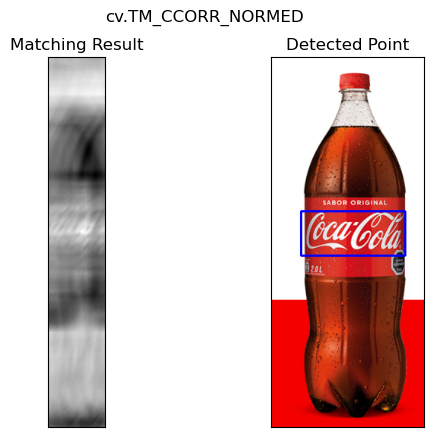

29307028.0 397894368.0 (40, 419) (60, 0)
(60, 0)


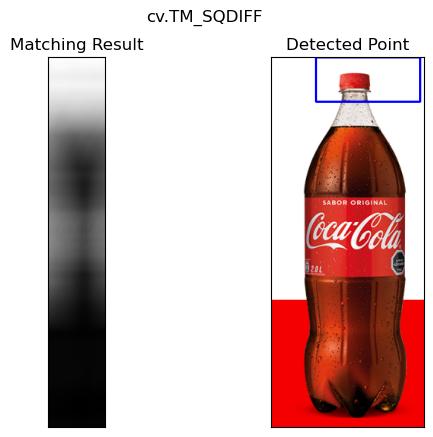

1.0 1.0 (0, 0) (0, 0)
(0, 0)


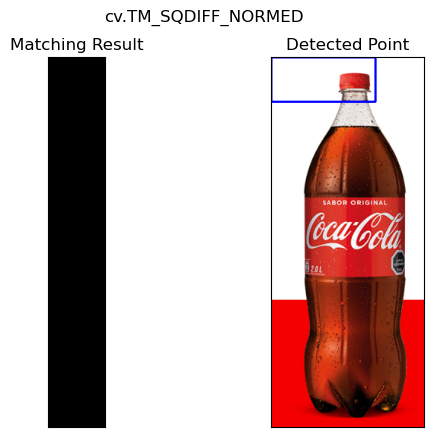

In [4]:
w, h = img_pattern_1.shape[::-1]
print("[INFO] performing template matching...")

methods = ["cv.TM_CCOEFF" , "cv.TM_CCOEFF_NORMED", "cv.TM_CCORR" , "cv.TM_CCORR_NORMED" , "cv.TM_SQDIFF" , "cv.TM_SQDIFF_NORMED"]

for m in methods:

    img1 = img_coca_logo_1.copy()
    method = eval(m)
    #Aplicamos la coincidencia de patrones
    img1_match = cv.matchTemplate(img_coca_logo_1_gray, img_pattern1, method)
    minVal, maxVal, minLoc, maxLoc = cv.minMaxLoc(img1_match)
    
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = minLoc
    else:
        top_left = maxLoc
    
    print(minVal, maxVal, minLoc, maxLoc)

    #Indicamos el lugar donde se produjo la coincidencia
    top_left = maxLoc
    bottom_rigth = (top_left[0] + w, (top_left[1] + h))
    print(top_left)

    cv.rectangle(img1, top_left, bottom_rigth, (0,0,255), 2)

    # Plot results obtained
    plt.subplot(121),plt.imshow(img1_match,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Original image with bounding box
    plt.subplot(122),plt.imshow(img1)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(m)
    plt.show()


### Coca logo 2

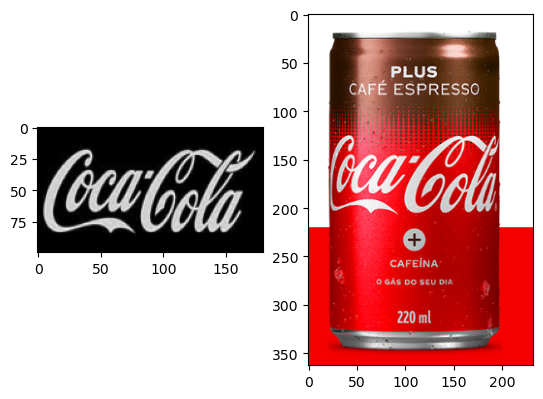

In [5]:
#Images to process
img_2 = cv.imread('./imgs/tp3/images/coca_logo_2.png')
img_pattern_2 = cv.resize(img_pattern, [180, 100])
img_pattern2 = cv.bitwise_not(img_pattern_2)

img_coca_logo_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
img_coca_logo_2_gray = cv.cvtColor(img_2, cv.COLOR_RGB2GRAY)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_pattern2, cmap= 'gray')
plt.subplot(1,2,2)
plt.imshow(img_coca_logo_2)

[INFO] performing template matching...


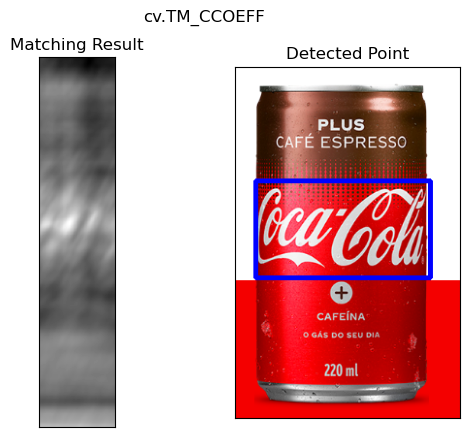

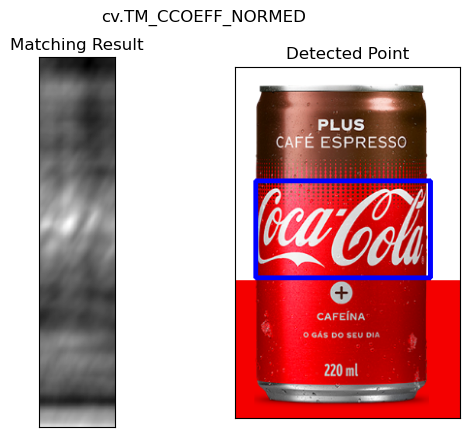

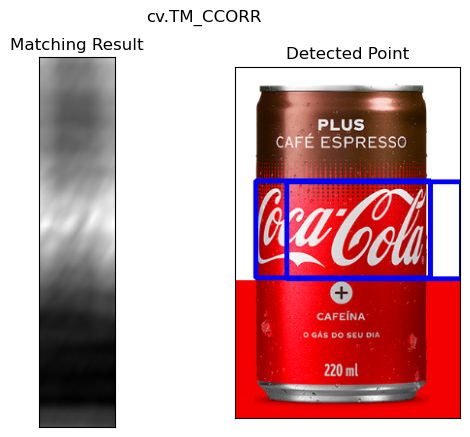

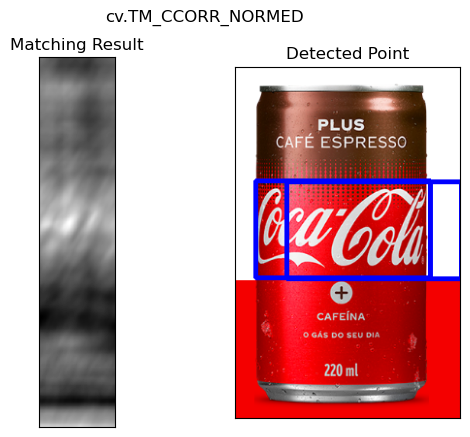

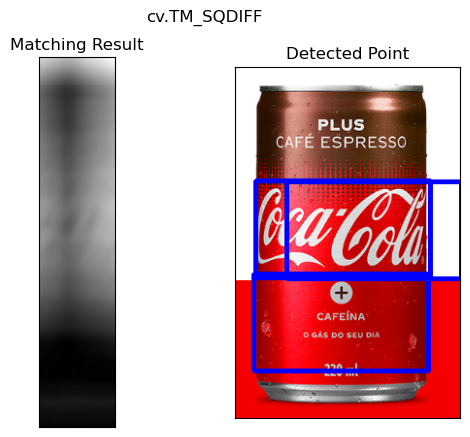

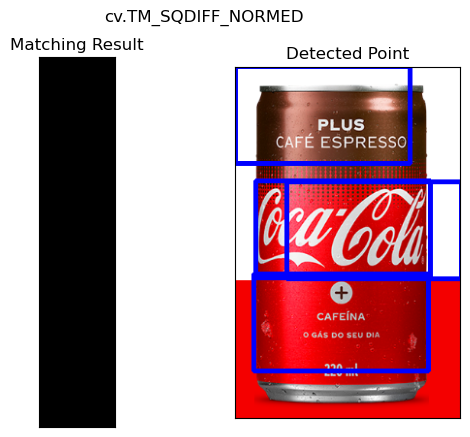

In [6]:
w, h = img_pattern_2.shape[::-1]
print("[INFO] performing template matching...")

methods = ["cv.TM_CCOEFF" , "cv.TM_CCOEFF_NORMED", "cv.TM_CCORR" , "cv.TM_CCORR_NORMED" , "cv.TM_SQDIFF" , "cv.TM_SQDIFF_NORMED"]

for m in methods:
    img2 = img_coca_logo_2.copy()

    method = eval(m)
    #Aplicamos la coincidencia de patrones
    img_match_2 = cv.matchTemplate(img_coca_logo_2_gray, img_pattern2, method)
    (minVal, maxVl, minLoc, maxLoc) = cv.minMaxLoc(img_match_2)


    #Indicamos el lugar donde se produjo la coincidencia
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = minLoc
    else:
        top_left = maxLoc
    
    
    bottom_rigth = (top_left[0] + w, (top_left[1]+ h))

    cv.rectangle(img_coca_logo_2, top_left, bottom_rigth, (0, 0, 255), 3)

    # Plot results obtained
    plt.subplot(121),plt.imshow(img_match_2,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
        
        # Original image with bounding box
    plt.subplot(122),plt.imshow(img_coca_logo_2)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
        
    plt.suptitle(m)
    plt.show()

### Coca-cola multi

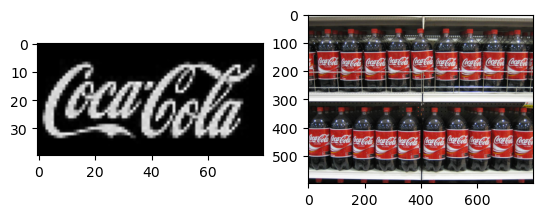

In [7]:
#Images to process
img_multi = cv.imread('./imgs/tp3/images/coca_multi.png')

# Resize dimensions of pattern image
img_pattern_multi = cv.bitwise_not(cv.resize(img_pattern, [80,40]))

img_coca_multi = cv.cvtColor(img_multi, cv.COLOR_BGR2RGB)
img_coca_multi_gray = cv.cvtColor(img_coca_multi, cv.COLOR_RGB2GRAY)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_pattern_multi, cmap= 'gray')
plt.subplot(1,2,2)
plt.imshow(img_coca_multi)

[INFO] performing template matching...
(404, 593)


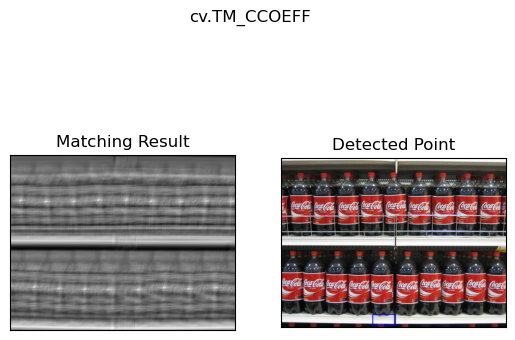

(112, 187)


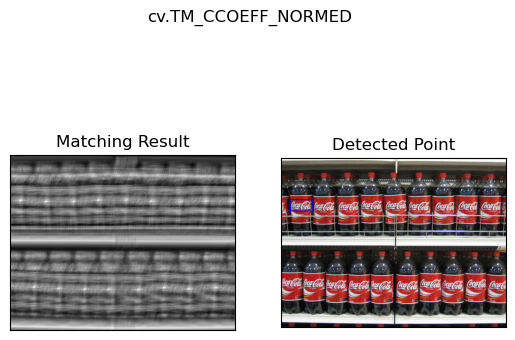

(608, 592)


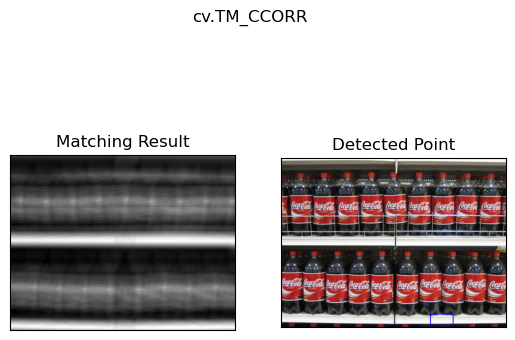

(112, 187)


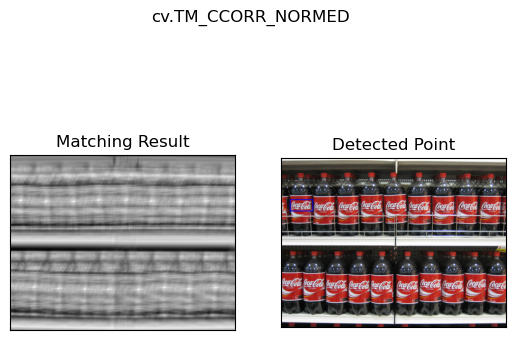

(703, 365)


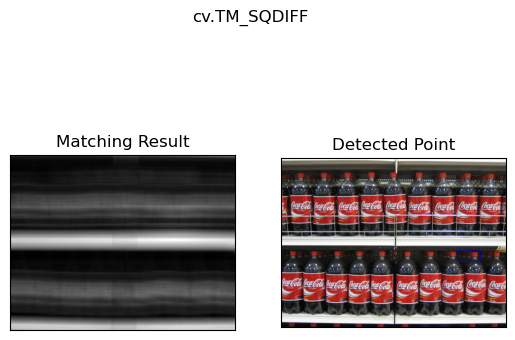

(160, 401)


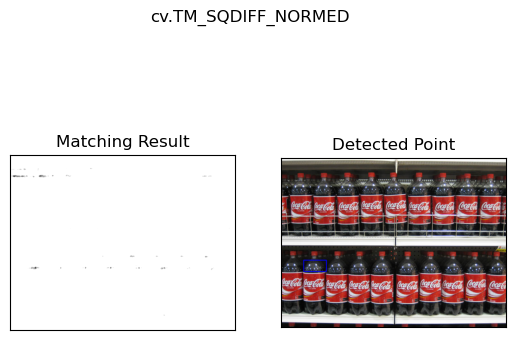

In [8]:
w, h = img_pattern_multi.shape[::-1]
print("[INFO] performing template matching...")

methods = ["cv.TM_CCOEFF" , "cv.TM_CCOEFF_NORMED", "cv.TM_CCORR" , "cv.TM_CCORR_NORMED" , "cv.TM_SQDIFF" , "cv.TM_SQDIFF_NORMED"]

#Aplicamos la coincidencia de patrones
for m in methods:
    img_cc_multi = img_coca_multi.copy()
    method = eval(m)
    img_multi_match = cv.matchTemplate(img_coca_multi_gray, img_pattern_multi,method)
    (minVal, maxVl, minLoc, maxLoc) = cv.minMaxLoc(img_multi_match)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = minLoc
    else:
        top_left = maxLoc
    
    #Indicamos el lugar donde se produjo la coincidencia
    bottom_rigth = (top_left[0] + w, (top_left[1]+ h))
    print(bottom_rigth)

    cv.rectangle(img_cc_multi, top_left, bottom_rigth, (0, 0, 255), 2)

    # Results of matching
    plt.subplot(121),plt.imshow(img_multi_match,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Original image with bounding box
    plt.subplot(122),plt.imshow(img_cc_multi)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(m)
    plt.show()

### Retro 1

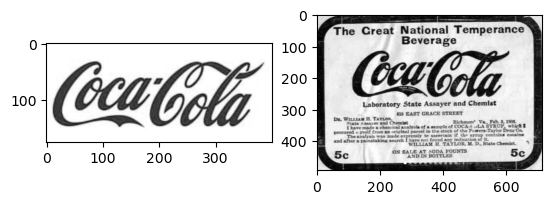

In [9]:
#Images to process
img_3 = cv.imread('./imgs/tp3/images/coca_retro_1.png', 0)

img_coca_retro_1 = cv.cvtColor(img_3, cv.COLOR_BGR2RGB)
img_coca_retro_1_gray = cv.cvtColor(img_coca_retro_1, cv.COLOR_RGB2GRAY)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_pattern, cmap= 'gray')
plt.subplot(1,2,2)
plt.imshow(img_coca_retro_1)

[INFO] performing template matching...
(508, 279)


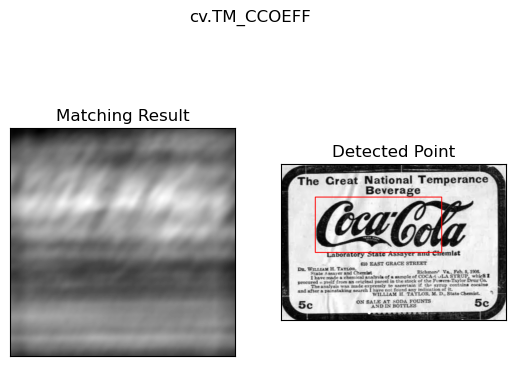

(508, 279)


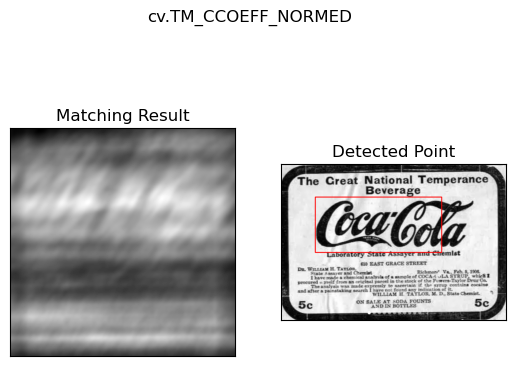

(427, 436)


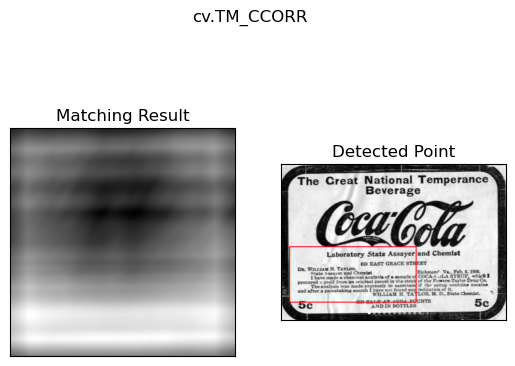

(516, 468)


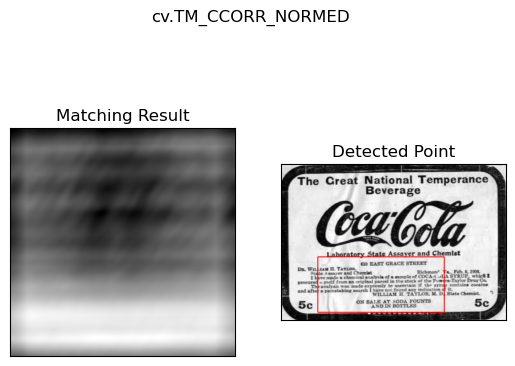

(516, 468)


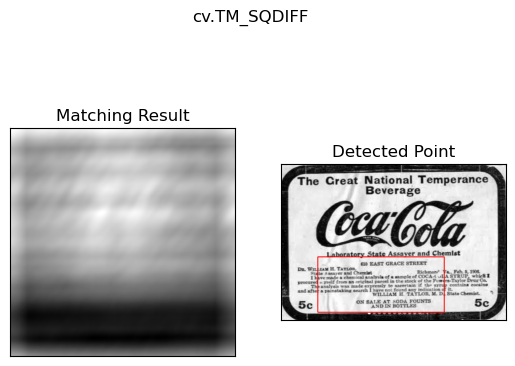

(516, 468)


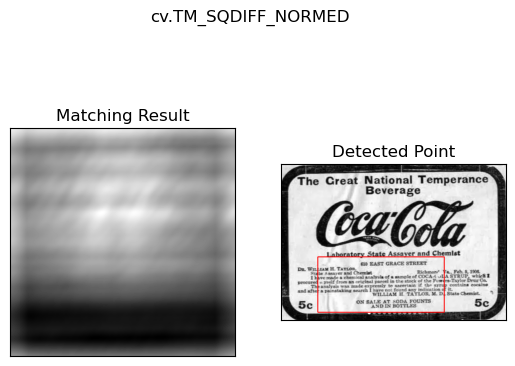

In [10]:
w, h = img_pattern.shape[::-1]
print("[INFO] performing template matching...")

methods = ["cv.TM_CCOEFF" , "cv.TM_CCOEFF_NORMED", "cv.TM_CCORR" , "cv.TM_CCORR_NORMED" , "cv.TM_SQDIFF" , "cv.TM_SQDIFF_NORMED"]

#Aplicamos la coincidencia de patrones
for m in methods:
    img3 = img_coca_retro_1.copy()
    method = eval(m)
    img3_match = cv.matchTemplate(img_coca_retro_1_gray, img_pattern,method)
    (minVal, maxVl, minLoc, maxLoc) = cv.minMaxLoc(img3_match)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = minLoc
    else:
        top_left = maxLoc
    
    #Indicamos el lugar donde se produjo la coincidencia
    bottom_rigth = (top_left[0] + w, (top_left[1]+ h))
    print(bottom_rigth)

    cv.rectangle(img3, top_left, bottom_rigth, (255, 0, 0), 2)

    # Results of matching
    plt.subplot(121),plt.imshow(img3_match,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Original image with bounding box
    plt.subplot(122),plt.imshow(img3)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(m)
    plt.show()

### Retro 2

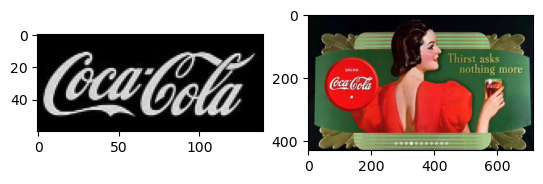

In [11]:
#Images to process
img_4 = cv.imread('./imgs/tp3/images/coca_retro_2.png')
img_pattern_4 = cv.resize(img_pattern, [140, 60])
img_pattern4 = cv.bitwise_not(img_pattern_4)

img_coca_retro_2 = cv.cvtColor(img_4, cv.COLOR_BGR2RGB)
img_coca_retro_2_gray = cv.cvtColor(img_coca_retro_2, cv.COLOR_RGB2GRAY)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_pattern4, cmap= 'gray')
plt.subplot(1,2,2)
plt.imshow(img_coca_retro_2)

140 60
[INFO] performing template matching...
(205, 247)


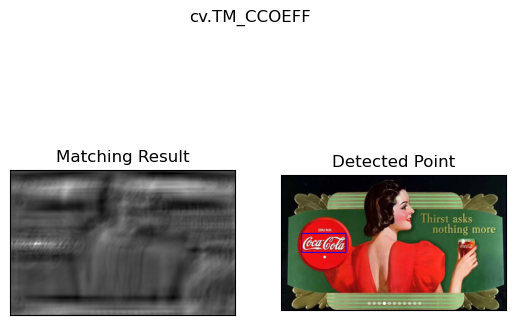

(205, 247)


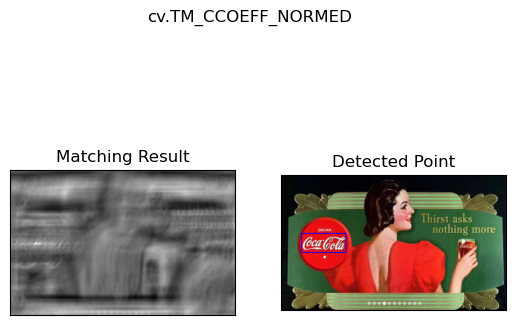

(205, 247)


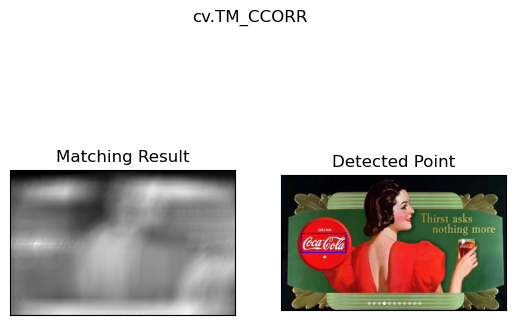

(205, 247)


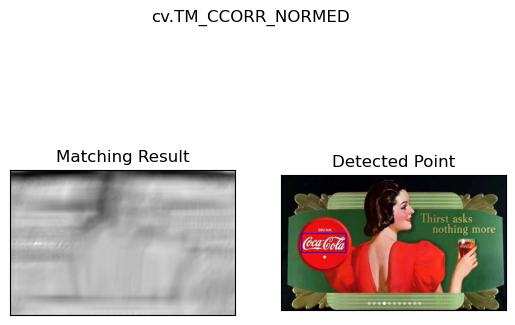

(715, 62)


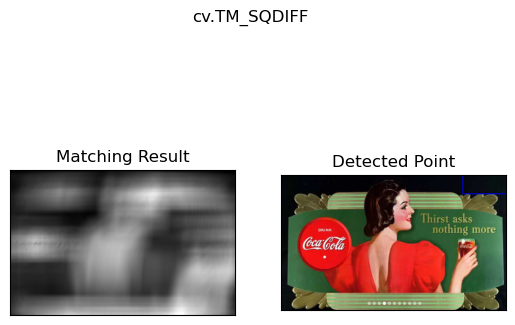

(283, 173)


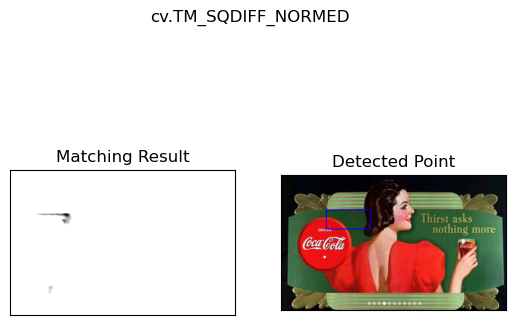

In [12]:
w, h = img_pattern_4.shape[::-1]
print(w, h)
print("[INFO] performing template matching...")

methods = ["cv.TM_CCOEFF" , "cv.TM_CCOEFF_NORMED", "cv.TM_CCORR" , "cv.TM_CCORR_NORMED" , "cv.TM_SQDIFF" , "cv.TM_SQDIFF_NORMED"]

for m in methods:
    img4 = img_coca_retro_2.copy()

    method = eval(m)

    #Aplicamos la coincidencia de patrones
    img4_match = cv.matchTemplate(img_coca_retro_2_gray, img_pattern4, method)
    (minVal, maxVl, minLoc, maxLoc) = cv.minMaxLoc(img4_match)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = minLoc
    else:
        top_left = maxLoc

    bottom_rigth = (top_left[0] + w, top_left[1] + h )
    print(bottom_rigth)
    
    cv.rectangle(img4, top_left, bottom_rigth, (0, 0, 255), 2)

    # Plot results obtained
    plt.subplot(121),plt.imshow(img4_match,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Original image with bounding box
    plt.subplot(122),plt.imshow(img4)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(m)
    plt.show()

### Coca cola logo

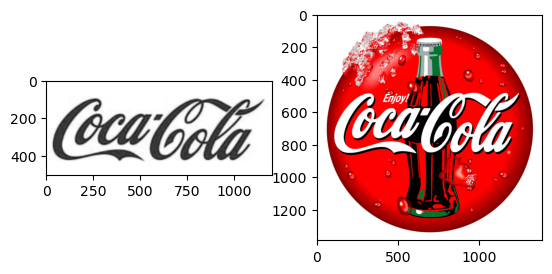

In [13]:
#Images to process
img_pattern_5 = cv.resize(img_pattern, [1200, 500])
img_pattern5 = cv.bitwise_not(img_pattern_5)
img_5 = cv.imread('./imgs/tp3/images/COCA-COLA-LOGO.jpg')

img_coca_cola_logo = cv.cvtColor(img_5, cv.COLOR_BGR2RGB)
img_coca_cola_logo_gray = cv.cvtColor(img_coca_cola_logo, cv.COLOR_RGB2GRAY)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_pattern_5, cmap= 'gray')
plt.subplot(1,2,2)
plt.imshow(img_coca_cola_logo)

1200 500
[INFO] performing template matching...
(73, 413)
(1273, 913)


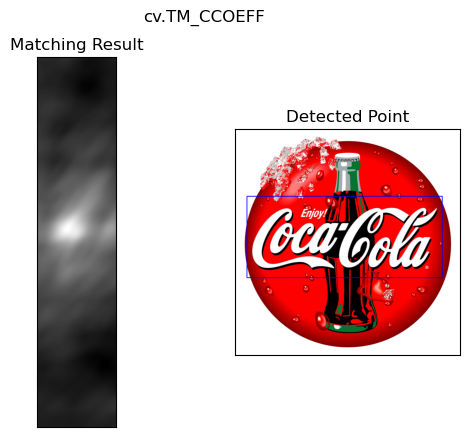

(73, 413)
(1273, 913)


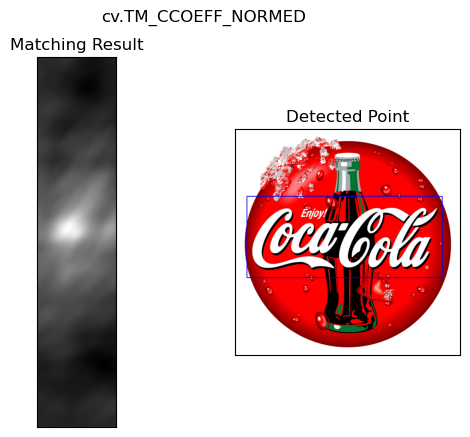

(73, 412)
(1273, 912)


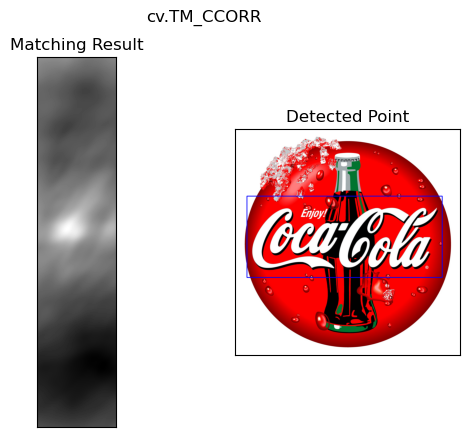

(73, 413)
(1273, 913)


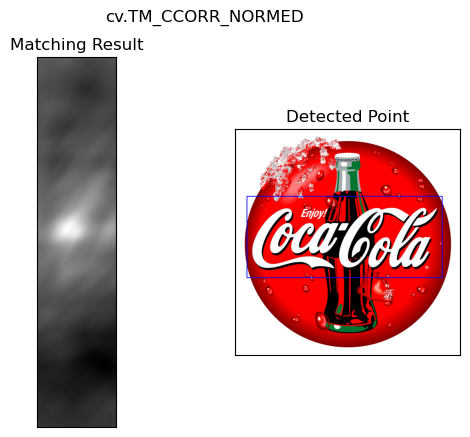

(189, 0)
(1389, 500)


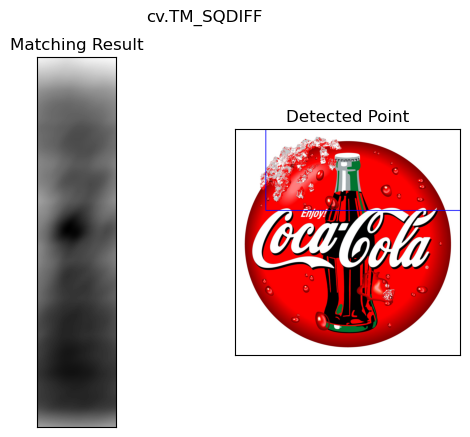

(0, 0)
(1200, 500)


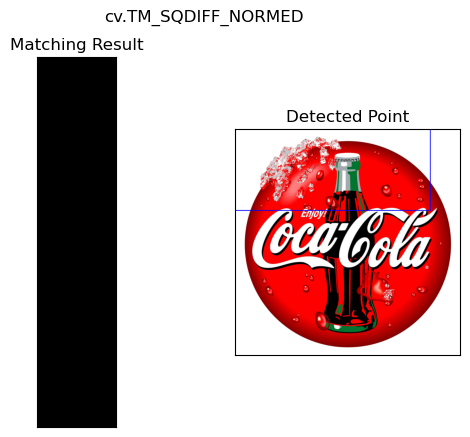

In [14]:
w, h = img_pattern_5.shape[::-1]
print(w, h)
print("[INFO] performing template matching...")

methods = ["cv.TM_CCOEFF" , "cv.TM_CCOEFF_NORMED", "cv.TM_CCORR" , "cv.TM_CCORR_NORMED" , "cv.TM_SQDIFF" , "cv.TM_SQDIFF_NORMED"]

for m in methods:
    img5 = img_coca_cola_logo.copy()

    method = eval(m)

    #Aplicamos la coincidencia de patrones
    img5_match = cv.matchTemplate(img_coca_cola_logo_gray, img_pattern5, method)
    (minVal, maxVl, minLoc, maxLoc) = cv.minMaxLoc(img5_match)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = minLoc
    else:
        top_left = maxLoc

    #Indicamos el lugar donde se produjo la coincidencia
    top_left = maxLoc
    print(maxLoc)
    bottom_rigth = (top_left[0] + w, top_left[1] + h )
    print(bottom_rigth)
    
    cv.rectangle(img5, top_left, bottom_rigth, (0, 0, 255), 3)

    # Plot results obtained
    plt.subplot(121),plt.imshow(img5_match,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Original image with bounding box
    plt.subplot(122),plt.imshow(img5)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(m)
    plt.show()

### Logo 1

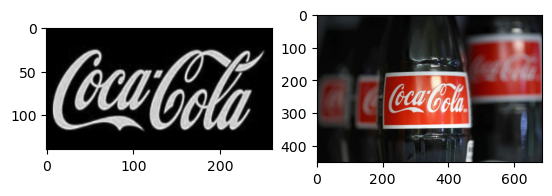

In [15]:
#Images to process
img_pattern_6 =  cv.bitwise_not(cv.resize(img_pattern, [260, 140]))
img_6 = cv.imread('./imgs/tp3/images/logo_1.png')

img_logo_1 = cv.cvtColor(img_6, cv.COLOR_BGR2RGB)
img_logo_1_gray = cv.cvtColor(img_logo_1, cv.COLOR_RGB2GRAY)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_pattern_6, cmap= 'gray')
plt.subplot(1,2,2)
plt.imshow(img_logo_1)

260 140
[INFO] performing template matching...
(208, 183)
(468, 323)


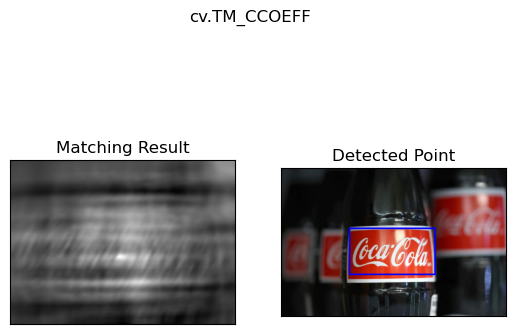

(208, 183)
(468, 323)


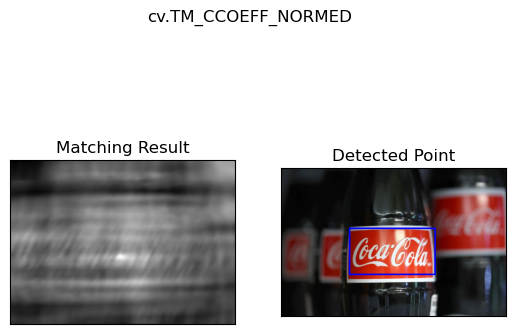

(208, 182)
(468, 322)


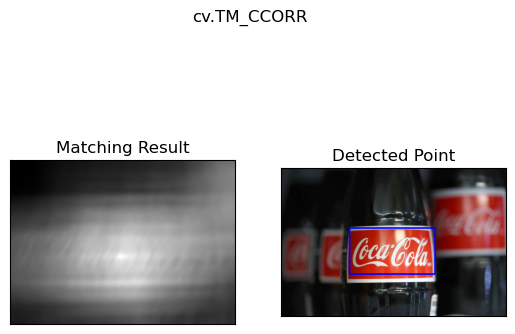

(208, 183)
(468, 323)


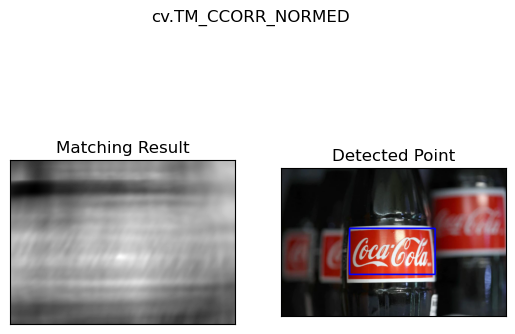

(208, 209)
(468, 349)


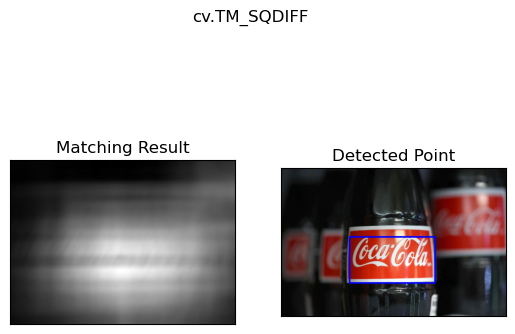

(0, 0)
(260, 140)


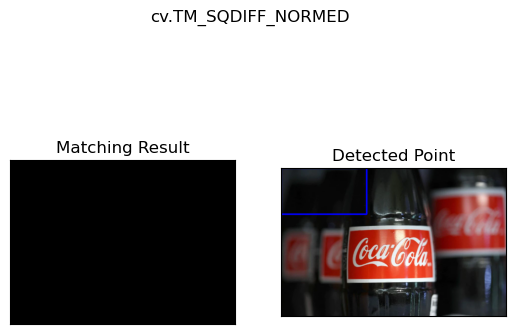

In [16]:
w, h = img_pattern_6.shape[::-1]
print(w, h)
print("[INFO] performing template matching...")

methods = ["cv.TM_CCOEFF" , "cv.TM_CCOEFF_NORMED", "cv.TM_CCORR" , "cv.TM_CCORR_NORMED" , "cv.TM_SQDIFF" , "cv.TM_SQDIFF_NORMED"]

for m in methods:
    img6 = img_logo_1.copy()

    method = eval(m)

    #Aplicamos la coincidencia de patrones
    img6_match = cv.matchTemplate(img_logo_1_gray, img_pattern_6, method)
    (minVal, maxVl, minLoc, maxLoc) = cv.minMaxLoc(img6_match)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = minLoc
    else:
        top_left = maxLoc

    #Indicamos el lugar donde se produjo la coincidencia
    top_left = maxLoc
    print(maxLoc)
    bottom_rigth = (top_left[0] + w, top_left[1] + h )
    print(bottom_rigth)
    
    cv.rectangle(img6, top_left, bottom_rigth, (0, 0, 255), 3)

    # Plot results obtained
    plt.subplot(121),plt.imshow(img6_match,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    
    # Original image with bounding box
    plt.subplot(122),plt.imshow(img6)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
    plt.suptitle(m)
    plt.show()

In [ ]:
def detection_logo():
    img_dir = './imgs/tp3/images/'
    pattern = cv.imread('./imgs/tp3/template/pattern.png', 0)
    ext = ['png', 'jpg']
    files = []
    image_gray = []
    [files.extend(glob.glob(img_dir + '*.' + e)) for e in ext]

    images = [cv.imread(file) for file in files]

    # Pre-processing img pattern
    pattern_canny = cv.bitwise_not(cv.Canny(pattern, 50, 200))

    # Storing the height and width of template image
    h_pattern, w_pattern = pattern_canny.shape

    found = None

    for im in images:
        img_color = cv.cvtColor(im, cv.COLOR_BGR2RGB)
        img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
        # Array of image gray
        image_gray.append(img_gray)
        h_img, w_img = img_gray.shape

        # Multi-scale
        for scale in np.linspace(0.1, 1.0, 10)[::-1]:
            img_resized = imutils.resize(
                img_gray, width=int(img_gray.shape[1] * scale))
            r = img_gray.shape[1]/float(img_resized.shape[1])

            if img_resized.shape[0] < h_pattern or img_resized.shape[1] < w_pattern:
                break

            img_canny = cv.Canny(img_resized, 50, 200)
            img_output = cv.matchTemplate(
                img_canny, pattern_canny, cv.TM_CCOEFF_NORMED)
            (minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(img_output)

            if found is None or maxVal > found[0]:
                found = (maxVal, maxLoc, r)
            (_, maxLoc, r) = found

            (startX, startY) = (int(maxLoc[0]*r), int((maxLoc[1]*r)))
            (endX, endY) = (
                int(maxLoc[0]*r + w_pattern), int((maxLoc[1]*r + h_pattern)))

            img_match = cv.rectangle(
                img_color, (startX, startY), (endX, endY), (0, 0, 255), 2)

        plt.figure()
        plt.imshow(img_color)

    return

### Ejercicio 2

Text(0.5, 1.0, 'Result')

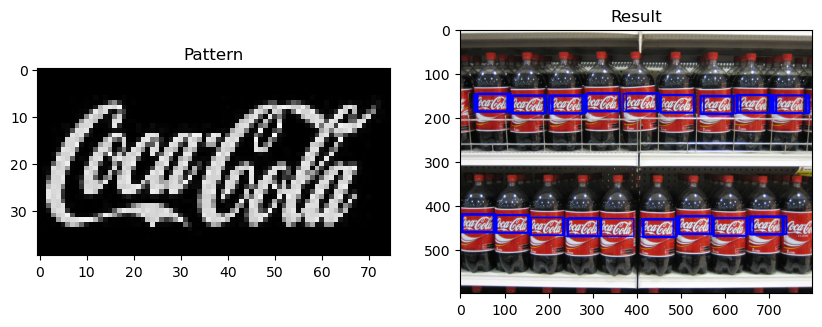

In [17]:
img = cv.imread('./imgs/tp3/images/coca_multi.png')
img_coca_cola  = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_coca_cola_gray = cv.cvtColor(img_coca_cola, cv.COLOR_BGR2GRAY)
img_template = cv.bitwise_not(cv.resize(img_pattern, [75,40]))

w, h = img_template.shape[::-1]
res = cv.matchTemplate(img_coca_cola_gray,img_template,cv.TM_CCORR_NORMED)

# Fijamos un umbral de "coincidencia"
threshold = 0.63


loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_coca_cola, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img_template, cmap='gray')
plt.title('Pattern')

plt.subplot(122)
plt.imshow(img_coca_cola)
plt.title('Result')

#cv.imwrite('res.png',img_rgb)

In [ ]:
def logo_detection():
    imgs, imgs_gray, images_color = read_imag()
    img_bitwise_list, image_resized_list = scale_img()
    pattern = cv.imread('./imgs/tp3/template/pattern.png', 0)


    found = None
    for i, j, k in zip(range(len(img_bitwise_list)), range(len(imgs_gray)), range(len(images_color))):
        w_pattern, h_pattern = img_bitwise_list[i].shape[::-1]
        w, h = imgs_gray[j].shape[::-1]
        if w_pattern > w or h_pattern > h:
            print("Rescaling the template image")
            scale_percent_w = 50
            scale_percent_h = 40
            width = int(img_bitwise_list[i].shape[1]*scale_percent_w/100)
            heigth = int(img_bitwise_list[i].shape[0]*scale_percent_h/100)
            dim = (width, heigth)
            img_rescale = cv.resize(
                img_bitwise_list[i], dim, interpolation=cv.INTER_AREA)
        else:
            img_rescale = img_bitwise_list[i]

        w_rescale_pattern, h_rescale_pattern = img_rescale.shape[::-1]

        image_canny_pattern = cv.Canny(
            img_rescale, threshold1=50, threshold2=100)
        img_canny = cv.Canny(imgs_gray[j], threshold1=100, threshold2=200)

        print("[INFO] performing template matching...")
        method = 'cv.TM_CCOEFF'
        img_match = cv.matchTemplate(
            img_canny, image_canny_pattern, eval(method))
        (minVal, maxVl, minLoc, maxLoc) = cv.minMaxLoc(img_match)
        top_left = maxLoc

        # Indicamos el lugar donde se produjo la coincidencia
        bottom_rigth = (top_left[0] + w_rescale_pattern,
                        (top_left[1] + h_rescale_pattern))

        print(img_match)

        # threshold = maxVl
        # loc = np.where(img_match >= threshold)
        # for pt in zip(*loc[::-1]):
        # cv.rectangle(images_color[k], pt,
        #                 (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

        cv.rectangle(images_color[k], top_left, bottom_rigth, (0, 0, 255), 2)

        # Results of matching
        plt.subplot(121), plt.imshow(img_match, cmap='gray')
        plt.title('Matching Result'), plt.xticks([]), plt.yticks([])

        # Original image with bounding box
        plt.subplot(122), plt.imshow(images_color[k])
        plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

        plt.suptitle(method)
        plt.show()
    return

### Ejercicio 3